<a href="https://colab.research.google.com/github/satheesh347/Code_Conversion_Satheesh/blob/main/McD789.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
df = pd.read_csv('mcdonalds.csv')


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

# Load uploaded file
df = pd.read_csv('mcdonalds.csv')

# Step 7: Describing Segments


<ipython-input-65-ed512279d91f>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = df.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)


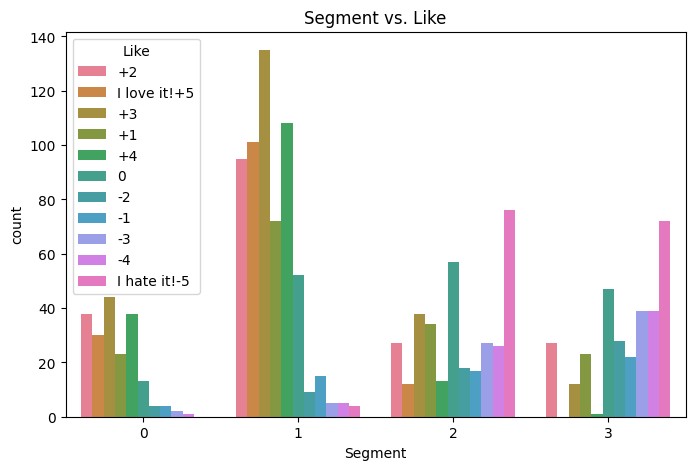

<Figure size 640x480 with 0 Axes>

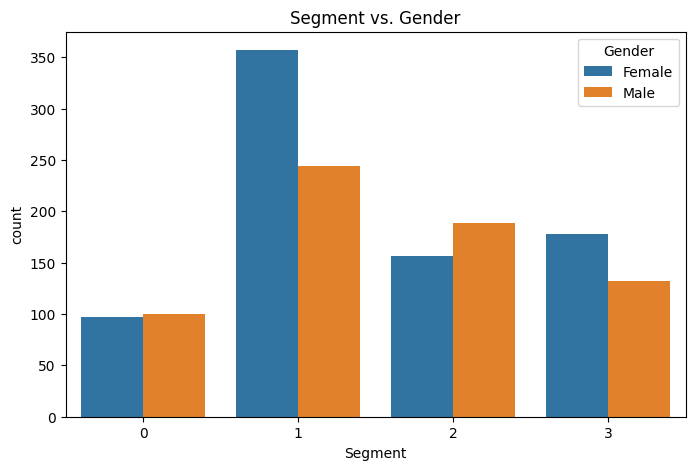

<Figure size 640x480 with 0 Axes>

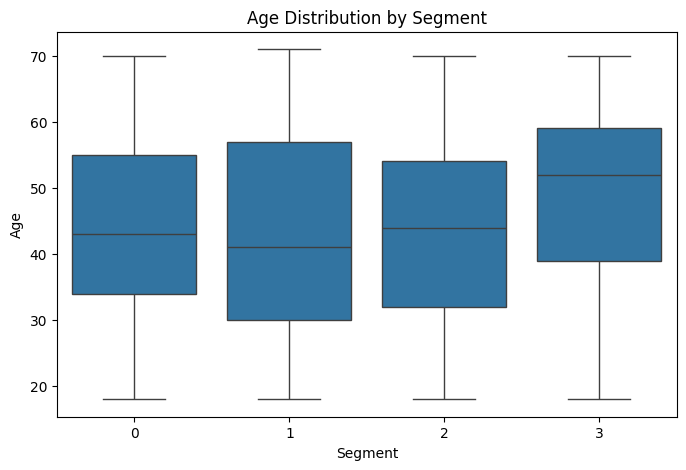

<Figure size 640x480 with 0 Axes>

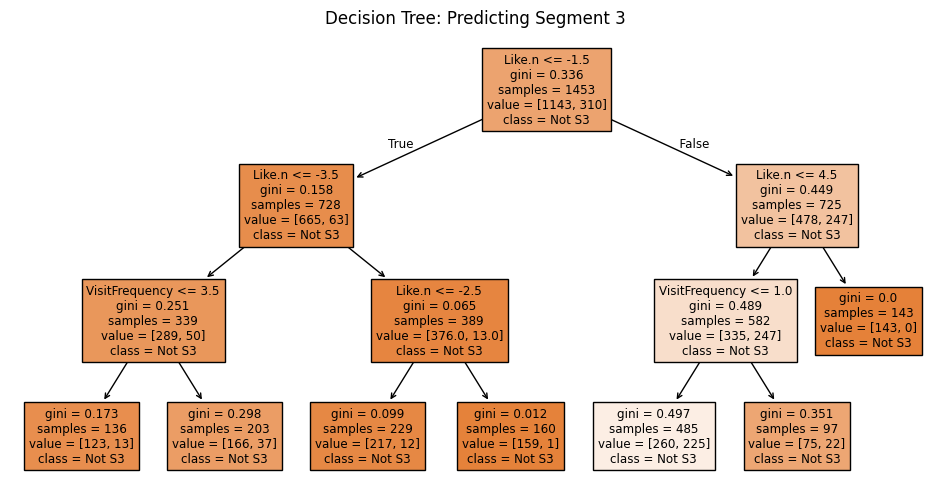

In [65]:
MD_x = df.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(MD_x)

# Plot: Segment vs. Like
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Segment', hue='Like')
plt.title("Segment vs. Like")
plt.show()
plt.tight_layout()

# Plot: Segment vs. Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Segment', hue='Gender')
plt.title("Segment vs. Gender")
plt.show()
plt.tight_layout()
# Boxplot: Age vs. Segment
plt.figure(figsize=(8, 5))
sns.boxplot(x='Segment', y='Age', data=df)
plt.title("Age Distribution by Segment")
plt.show()
plt.tight_layout()
# Conditional Inference Tree approximation
df['Like.n'] = df['Like'].astype('category').cat.codes - 5
df['Gender_n'] = df['Gender'].map({'Female': 1, 'Male': 0})

# Convert VisitFrequency to numeric
visit_map = {
    'Never': 0,
    'Less than once a month': 1,
    'Once a month': 2,
    'Every three weeks': 3,
    'Every two weeks': 4,
    'Once a week': 5,
    'Several times a week': 6,
    'Every day': 7
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_map)

# Prepare features and target
X = df[['Like.n', 'Age', 'VisitFrequency', 'Gender_n']]
y = (df['Segment'] == 3).astype(int)


dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X, y)

plt.figure(figsize=(12, 6))
plot_tree(dtree, feature_names=X.columns, class_names=['Not S3', 'S3'], filled=True)
plt.title("Decision Tree: Predicting Segment 3")
plt.show()

# Step 8: Segment Evaluation


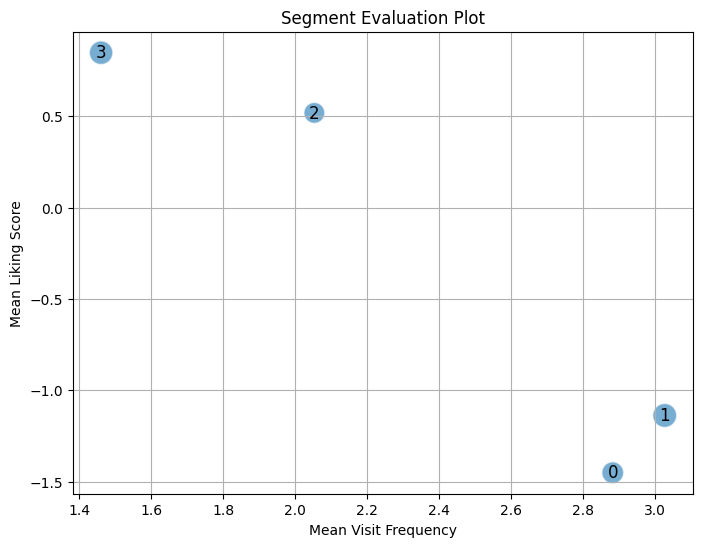

In [66]:
visit_means = df.groupby('Segment')['VisitFrequency'].mean()
like_means = df.groupby('Segment')['Like.n'].mean()
female_pct = df.groupby('Segment')['Gender_n'].mean()

plt.figure(figsize=(8, 6))
sizes = 500 * female_pct
plt.scatter(visit_means, like_means, s=sizes, alpha=0.6, edgecolors='w')
for i in range(4):
    plt.text(visit_means[i], like_means[i], str(i), fontsize=12, ha='center', va='center')
plt.xlabel("Mean Visit Frequency")
plt.ylabel("Mean Liking Score")
plt.title("Segment Evaluation Plot")
plt.grid(True)
plt.show()

# Step 9: Conceptual - No code, just insights from Step 7 & 8


In [67]:
print("Step 9 is conceptual: Customize Product, Price, Place, Promotion based on segment profiles.")

Step 9 is conceptual: Customize Product, Price, Place, Promotion based on segment profiles.
